In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [13]:
sns.set_style('whitegrid')

In [14]:
df = pd.read_csv('../Downloads/911.csv')

In [15]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633701 entries, 0 to 633700
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        633701 non-null  float64
 1   lng        633701 non-null  float64
 2   desc       633701 non-null  object 
 3   zip        556677 non-null  float64
 4   title      633701 non-null  object 
 5   timeStamp  633701 non-null  object 
 6   twp        633430 non-null  object 
 7   addr       633701 non-null  object 
 8   e          633701 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 43.5+ MB


In [17]:
df['zip'].value_counts().head(5)

19401.0    43284
19464.0    41728
19403.0    33243
19446.0    30776
19406.0    21463
Name: zip, dtype: int64

In [18]:
df['twp'].value_counts().head(5)

LOWER MERION    53240
ABINGTON        38208
NORRISTOWN      35678
UPPER MERION    34531
CHELTENHAM      29234
Name: twp, dtype: int64

In [19]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [20]:
df['Reason'].value_counts()

EMS        316715
Traffic    221933
Fire        95053
Name: Reason, dtype: int64

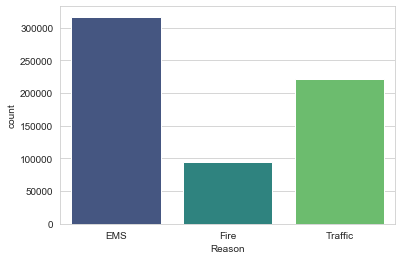

In [21]:
sns.countplot(x='Reason',data=df,palette='viridis')

In [22]:
type(df['timeStamp'].iloc[0])

str

In [23]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [24]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [25]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [26]:
df['Day of Week'] = df['Day of Week'].map(dmap)

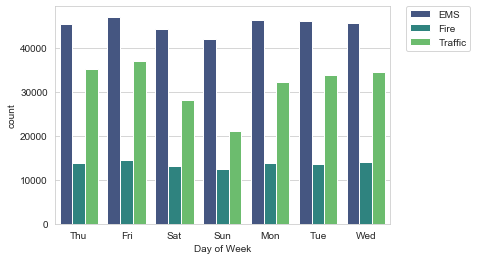

In [27]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

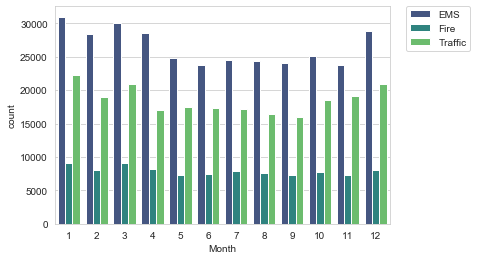

In [28]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [29]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,49490,49490,49490,43180,49490,49490,49466,49490,49490,49490,49490,49490


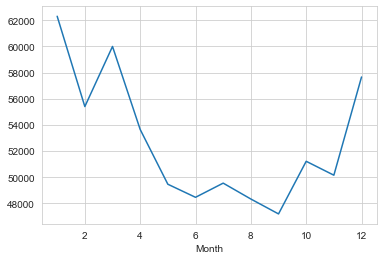

In [30]:
byMonth['twp'].plot()

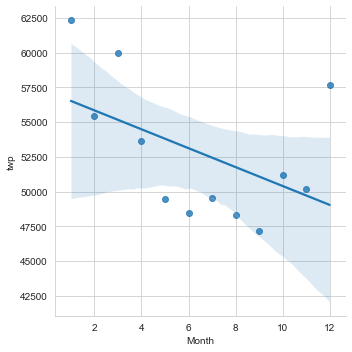

In [31]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [32]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

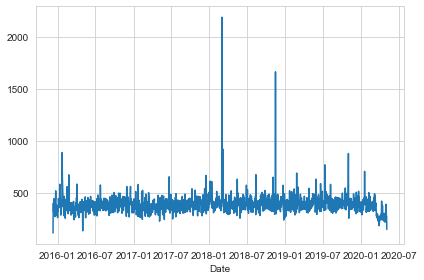

In [33]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

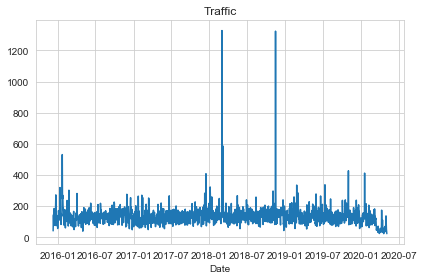

In [34]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

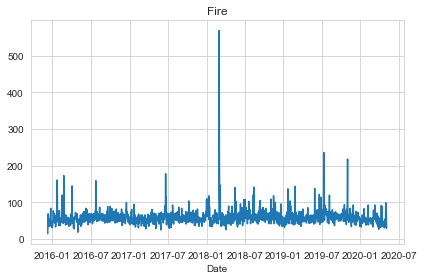

In [35]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

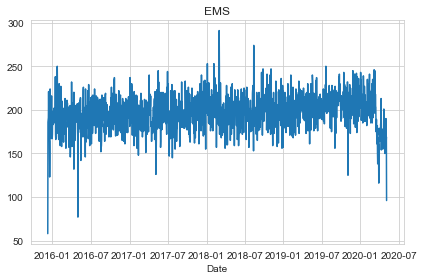

In [36]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [37]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1881,1547,1379,1246,1262,1564,2577,4006,4857,5057,...,6095,6729,6798,6832,5421,4824,4161,3702,3265,2723
Mon,1806,1491,1304,1214,1280,1759,2587,4301,5336,5516,...,5399,5906,6054,6155,5207,4275,3598,3096,2539,1970
Sat,2322,1963,1811,1521,1383,1503,1801,2396,3313,4148,...,5174,4951,4992,4970,4780,4559,3955,3715,3072,2831
Sun,2322,2057,1867,1540,1413,1411,1661,2304,2891,3572,...,4514,4270,4344,4311,4199,3980,3562,2993,2486,2213
Thu,1632,1328,1344,1175,1203,1690,2702,4303,5135,5162,...,5795,6205,6106,6680,5291,4486,3904,3343,2710,2252


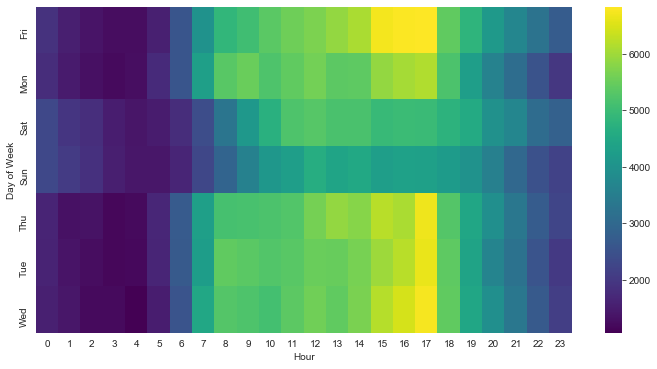

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

In [39]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,7543,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,6894,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,6068,6839,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,5684,5673,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,7524,7850,6964,7508,6954,7482,8358,8151


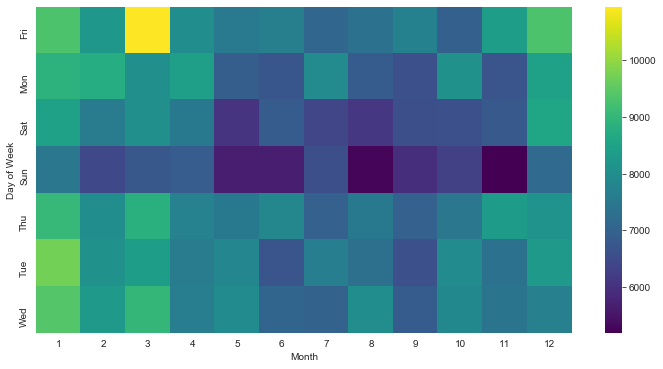

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')